# Chapter 0 - Pytorch Fundamentals

Link: https://www.youtube.com/watch?v=V_xro1bcAuA&t=105s

## What is a Tensor?
Data is represented as tensors.

In [57]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import sys

print("PyTorch version: ", torch.__version__)

PyTorch version:  2.1.0


In [3]:
# Create tensors
tensor = torch.ones(4, 4, 4)


In [7]:
# Scaler
scaler = torch.tensor(1)
print(scaler)
print(scaler.item())

tensor(1)
1


In [13]:
MATRIX = torch.tensor([[1,2], [3,4]])
print(MATRIX.ndim) # Number of dimensions
print(MATRIX.shape)

2
torch.Size([2, 2])


In [39]:
TENSOR = torch.arange(start=0, end=9, step=1, dtype=torch.float32, out=(torch.FloatTensor(3, 3)))
print(TENSOR)
print(TENSOR[0])
print(TENSOR[0][0])
print(TENSOR[:, 0])

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([0., 1., 2.])
tensor(0.)
tensor([0., 3., 6.])


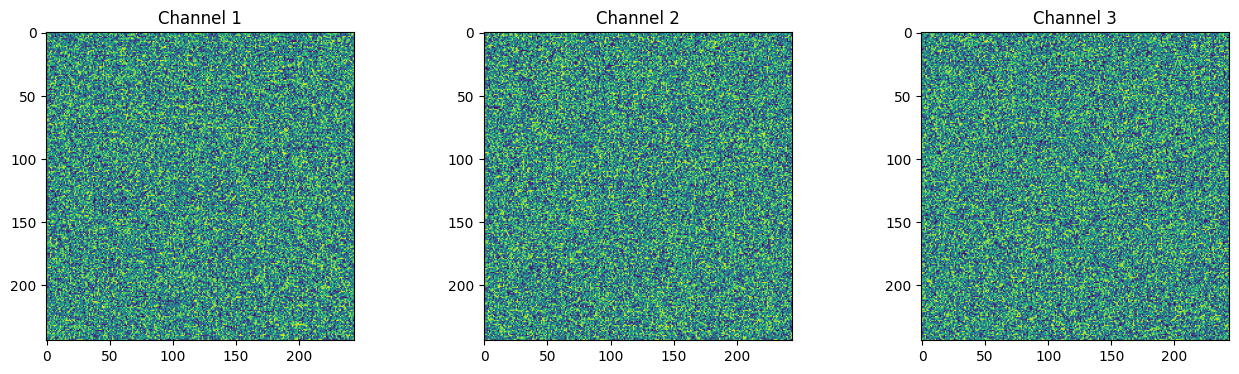

In [38]:
X = torch.rand(244, 244, 3)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, ax in enumerate(axes):
    ax.imshow(X[:, :, i])
    ax.set_title(f'Channel {i+1}')




In [67]:
one_to_nine = torch.arange(start=0, end=10, step=2)
ten_zeros = torch.zeros_like(one_to_nine)
print(one_to_nine)
print(ten_zeros)

torch_ones = torch.ones(2, 5)
tensor = torch.arange(start=0, end=11, step=1, layout=torch.strided, dtype=torch.float32, device='cpu')
print(tensor)

tensor([0, 2, 4, 6, 8])
tensor([0, 0, 0, 0, 0])
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


In [68]:
# Tensor Datatypes

float_tensor = torch.tensor([1, 2, 3], 
                            dtype=torch.float32, # what datatype to use
                            device=None, # what device to use
                            requires_grad=False # whether to track gradients
                            )
print(float_tensor.dtype)
print(sys.getsizeof(float_tensor))
print(sys.getsizeof([1., 2., 3.]))
print(sys.getsizeof([1, 2, 3]))


print(float_tensor.dtype)
print(float_tensor.shape)
print(float_tensor.device)

mult = torch.matmul(float_tensor, float_tensor)
print(mult)

torch.float32
88
88
88
torch.float32
torch.Size([3])
cpu
tensor(14.)


In [77]:
tensor_1 = torch.tensor([[1, 2, 3],[1, 2, 3]], dtype=torch.float32)
tensor_2 = torch.tensor([[1, 2, 3],[1, 2, 3]], dtype=torch.float32)

# torch.matmul(tensor_1, tensor_2)
print(tensor_2.shape)
print(tensor_2.T, tensor_2.T.shape)

print(torch.matmul(tensor_1, tensor_2.T))

torch.Size([2, 3])
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]]) torch.Size([3, 2])
tensor([[14., 14.],
        [14., 14.]])


In [89]:
# Tensor Aggregation
tensor = torch.tensor([[1, 2, 3],[1, 2, 3]], dtype=torch.float32)
print(tensor.sum())
print(tensor.sum(axis=-1))
print(tensor.sum(axis=0))

print(tensor.mean())
print(tensor.mean(axis=-1))
print(tensor.mean(axis=0))

print(tensor.argmin())
print(tensor.argmin(axis=-1))
print(tensor.argmin(axis=0))

print(tensor.argmax())
print(tensor.argmax(axis=-1))
print(tensor.argmax(axis=0))

tensor(12.)
tensor([6., 6.])
tensor([2., 4., 6.])
tensor(2.)
tensor([2., 2.])
tensor([1., 2., 3.])
tensor(0)
tensor([0, 0])
tensor([0, 0, 0])
tensor(2)
tensor([2, 2])
tensor([0, 0, 0])


In [116]:
# Reshaping, stacking, sqeezing, and unsqueezing
tensor = torch.tensor([[1, 2, 3],[1, 2, 3]], dtype=torch.float32)
print(tensor.shape)

print("Reshaping Tensor")
tensor = tensor.reshape(3, 2)
print(tensor)
tensor = tensor.reshape(2, 3)
print(tensor)

print("Stacking Tensor")
tensor_2 = torch.tensor([[1, 2, 3],[1, 2, 3]], dtype=torch.float32)
print(tensor_2.shape)
tensor_3 = torch.stack((tensor, tensor_2), axis=0)
print(tensor_3)
print(tensor_3.shape)

print("View Tensor")
tensor_4 = tensor.view(3, 2)
tensor_4[:, 0] = 0
print("Tensor 4", tensor_4, tensor_4.shape)
print("Tensor", tensor, tensor.shape)

print("Squeezing Tensor")
tensor = torch.tensor([[[1, 2, 3],[1, 2, 3]]], dtype=torch.float32)
print(tensor, tensor.shape)
tensor_5 = tensor.squeeze(dim=0) # Remove all dimensions of size 1
print(tensor_5, tensor_5.shape)
tensor_6 = tensor_5.unsqueeze(dim=0)
print(tensor_6, tensor_6.shape)
tensor_7 = tensor_6.unsqueeze(dim=0)
print(tensor_7, tensor_7.shape)

torch.Size([2, 3])
Reshaping Tensor
tensor([[1., 2.],
        [3., 1.],
        [2., 3.]])
tensor([[1., 2., 3.],
        [1., 2., 3.]])
Stacking Tensor
torch.Size([2, 3])
tensor([[[1., 2., 3.],
         [1., 2., 3.]],

        [[1., 2., 3.],
         [1., 2., 3.]]])
torch.Size([2, 2, 3])
View Tensor
Tensor 4 tensor([[0., 2.],
        [0., 1.],
        [0., 3.]]) torch.Size([3, 2])
Tensor tensor([[0., 2., 0.],
        [1., 0., 3.]]) torch.Size([2, 3])
Squeezing Tensor
tensor([[[1., 2., 3.],
         [1., 2., 3.]]]) torch.Size([1, 2, 3])
tensor([[1., 2., 3.],
        [1., 2., 3.]]) torch.Size([2, 3])
tensor([[[1., 2., 3.],
         [1., 2., 3.]]]) torch.Size([1, 2, 3])
tensor([[[[1., 2., 3.],
          [1., 2., 3.]]]]) torch.Size([1, 1, 2, 3])


In [121]:
# Permute
tensor = torch.tensor([[1, 2, 3],[4, 5, 6]], dtype=torch.float32)
print(tensor, tensor.shape)

tensor_1 = tensor.permute(1, 0)
print(tensor_1, tensor_1.shape)

tensor = torch.arange(start=0, end=12, step=1, dtype=torch.float32)
tensor = tensor.reshape(2, 2, 3)

tensor([[1., 2., 3.],
        [4., 5., 6.]]) torch.Size([2, 3])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]]) torch.Size([3, 2])


In [132]:
# Indexing

tensor = torch.arange(start=0, end=9, step=1, dtype=torch.float32)
tensor = tensor.reshape(1, 3, 3)
print(tensor, tensor.shape)

print(tensor[0])
print(tensor[0, 0, 0])
print(tensor[0, 0, 1])
print(tensor[0, 1, :])
print(tensor[:, 1, :])
print(tensor[:, :, 1])
print(tensor[:, :, 2])

tensor([[[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]]) torch.Size([1, 3, 3])
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor(0.)
tensor(1.)
tensor([3., 4., 5.])
tensor([[3., 4., 5.]])
tensor([[1., 4., 7.]])
tensor([[2., 5., 8.]])


In [141]:
# Pytorch and Numpy
numpy_array = np.array([1, 2, 3])
print(numpy_array, type(numpy_array))
tensor = torch.from_numpy(numpy_array) # Create a tensor from a numpy array
tensor += 1 # Add 1 to each element in the tensor
print(numpy_array, type(numpy_array)) # The numpy array is changed as well
print(tensor, type(tensor), tensor.dtype) # The tensor is changed as well


numpy_array = tensor.numpy()
print(numpy_array, type(numpy_array))

[1 2 3] <class 'numpy.ndarray'>
[2 3 4] <class 'numpy.ndarray'>
tensor([2, 3, 4]) <class 'torch.Tensor'> torch.int64
[2 3 4] <class 'numpy.ndarray'>


In [148]:
import torch


# Random Numbers
tensor1 = torch.rand(3, 3)
tensor2 = torch.rand(3, 3)

print(tensor1 == tensor2)

# Set seed
torch.manual_seed(42)
tensor1 = torch.rand(3, 3)
torch.manual_seed(42)
tensor2 = torch.rand(3, 3)

print(tensor1 == tensor2)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [160]:
# Set up device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device)

tensor = torch.tensor([1, 2, 3])
print(tensor)

tensor = tensor.to(device)
print("Tensor", tensor.device)
tensor = tensor.to('cpu')
print("Tensor", tensor.device)

mps
tensor([1, 2, 3])
Tensor mps:0
Tensor cpu
